In [1]:
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# Prep request from OpenWeatherMap

import requests as req
import json

url = "http://api.openweathermap.org/data/2.5/weather"
api_key = "ab24206853f319ea96c17f7f686fb5a7"

In [3]:
# Empty lists to fill

lats = []
longs = []
cities = []
temps = []
humids = []
clouds = []
winds = []
coords = []

In [4]:
# Coordinates of random cities

while len(cities) < 500:
    # Store coords - Lat (-90 to +90) and long(-180 to +180)
    lat = random.randrange(-9000, 9000)/100
    long = random.randrange(-18000, 18000)/100
    # Store city name
    city = citipy.nearest_city(lat, long)
    if cities.count(city.city_name) == 0:
        cities.append(city.city_name)
        lats.append(lat)
        longs.append(long)
        coords.append([lat,long])

In [6]:
# Get weather info and print log

for i, [lat, long] in enumerate(coords):
# Store temps
    temp = req.get(url, params = {
        "appid": api_key, "lat": lat, "lon": long,
        "units": "imperial"
        })
    temps.append(temp.json()["main"]["temp"])
    print("Processing city " + str((i + 1)) + "/500: ", cities[i],
          " | Temperature (F)\n", temp.url)
# Store humidity
    humid  = req.get(url, params = {
        "appid": api_key, "lat": lat, "lon": long
    })
    humids.append(humid.json()["main"]["humidity"])
    print("Processing city " + str((i + 1)) + "/500: ", cities[i],
          " | Humidity (%)\n", humid.url)
# Store cloudiness
    cloud  = req.get(url, params = {
        "appid": api_key, "lat": lat, "lon": long
    })
    clouds.append(cloud.json()["clouds"]["all"])
    print("Processing city " + str((i + 1)) + "/500: ", cities[i],
          " | Cloudiness (%)\n", cloud.url)
# Store windspeed
    wind  = req.get(url, params = {
        "appid": api_key, "lat": lat, "lon": long,
        "units": "imperial"
    })
    winds.append(wind.json()["wind"]["speed"])
    print("Processing city " + str((i + 1)) + "/500: ", cities[i],
          " | Wind speed (mph)\n", wind.url, "\n")

Processing city 1/500:  vardo  | Temperature (F)
 http://api.openweathermap.org/data/2.5/weather?appid=ab24206853f319ea96c17f7f686fb5a7&lat=84.63&lon=34.38&units=imperial
Processing city 1/500:  vardo  | Humidity (%)
 http://api.openweathermap.org/data/2.5/weather?appid=ab24206853f319ea96c17f7f686fb5a7&lat=84.63&lon=34.38
Processing city 1/500:  vardo  | Cloudiness (%)
 http://api.openweathermap.org/data/2.5/weather?appid=ab24206853f319ea96c17f7f686fb5a7&lat=84.63&lon=34.38
Processing city 1/500:  vardo  | Wind speed (mph)
 http://api.openweathermap.org/data/2.5/weather?appid=ab24206853f319ea96c17f7f686fb5a7&lat=84.63&lon=34.38&units=imperial 

Processing city 2/500:  albany  | Temperature (F)
 http://api.openweathermap.org/data/2.5/weather?appid=ab24206853f319ea96c17f7f686fb5a7&lat=-61.75&lon=103.25&units=imperial
Processing city 2/500:  albany  | Humidity (%)
 http://api.openweathermap.org/data/2.5/weather?appid=ab24206853f319ea96c17f7f686fb5a7&lat=-61.75&lon=103.25
Processing city 2

In [7]:
# Create df of weather data
df = pd.DataFrame({"City": cities,
                  "Latitude": lats, "Longitude": longs,
                  "Temperature (F)": temps,
                  "Humidity (%)": humids,
                  "Cloudiness (%)": clouds,
                  "Wind speed (mph)": winds})
df = df[["City", "Latitude", "Longitude", "Temperature (F)",
        "Humidity (%)", "Cloudiness (%)", "Wind speed (mph)"]].sort_values("City")

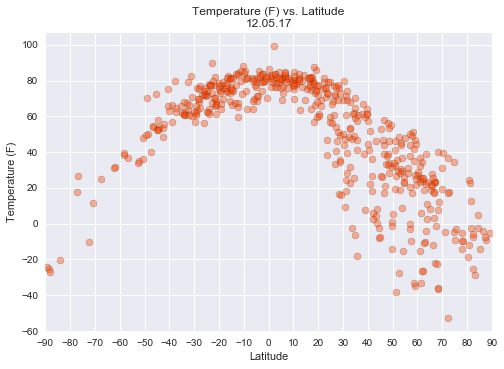

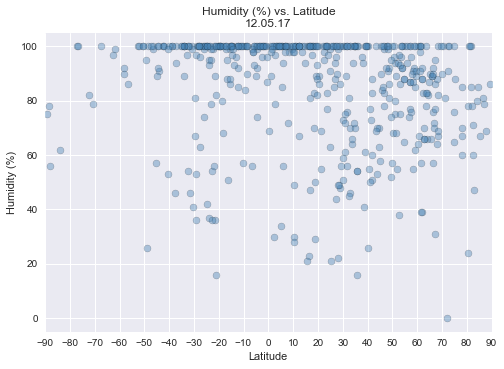

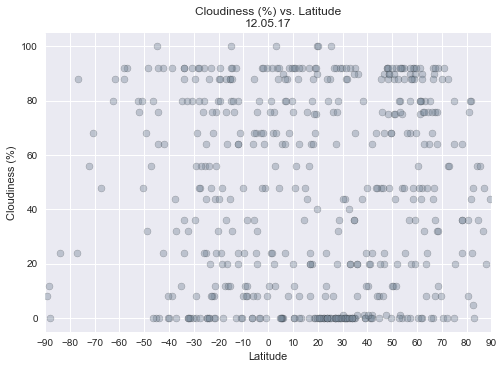

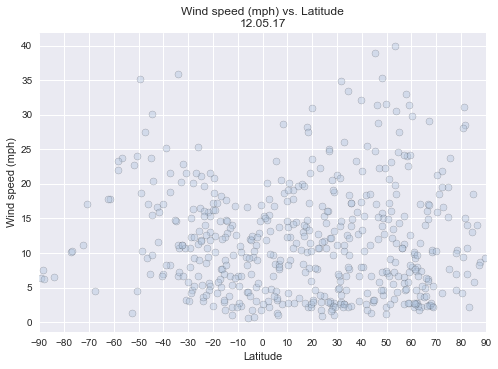

In [8]:
# Scatterplots
import seaborn as sns
import datetime

# Folder to save pngs
import os
os.mkdir("Scatterplots")

# Colors for each plot
colors = ["orangered", "steelblue", "lightslategrey", "lightsteelblue"]
#List of scatterplot y axes
ys = ["Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind speed (mph)"]

# Create plots
for i, y in enumerate(ys):
    plt.scatter(x = df["Latitude"], y = df[y], c = colors[i], edgecolors = "black", alpha = .4)
    plt.xlabel("Latitude")
    plt.ylabel(y)
    plt.xlim(-90, 90)
    plt.xticks(range(-90, 91, 10))
    plt.title(y + " vs. Latitude\n" +
             datetime.datetime.now().strftime("%m.%d.%y"))
    plt.savefig("Scatterplots/"+y+" vs. Latitude.png")
    plt.show()

In [9]:
# Save weather data to csv
df.to_csv("WeatherData.csv", index = False)